# Adult Census Data

**Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.**

### Data Information
- Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
- Prediction task is to determine whether a person makes over 50K a year.

### Attribute Information
- Listing of attributes: >50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD




In [16]:
adult_df = pd.read_csv('./adult_df.csv')
adult_df.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [17]:
adult_df_test = pd.read_csv('./adult_df_test.csv')
# Remove '.' in income column
adult_df_test['class'] = adult_df_test['class'].apply(lambda x: '>50K' if x=='>50K.' else '<=50K')
adult_df_test.head(4)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


In [18]:
adult_df_test.drop('Unnamed: 0', axis=1, inplace=True)
adult_df.drop('Unnamed: 0', axis=1, inplace=True)


In [19]:
adult_df.head(4)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


Data values by class of feature class:
<=50K    22654
>50K      7508
Name: class, dtype: int64

Percentage of data values by class of feature class:
<=50K    0.751078
>50K     0.248922
Name: class, dtype: float64

Unique values of feature class:
['<=50K' '>50K']



[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

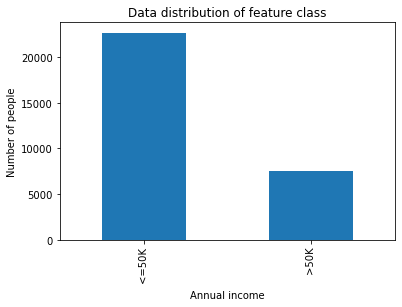

In [20]:

def categorical_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #total feature values by category
  print('Percentage of data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of total feature values by category
  print('Unique values of feature %s:\n%s\n'  % (var_name, df[var_name].unique())) #feature's unique values

var='class'
categorical_feature_analysis(adult_df, var)

##plot distribution
ax=adult_df[var].value_counts().plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of people')
ax.set_xlabel('Annual income')
ax.set_xticklabels(labels=[' <=50K', ' >50K'])



The income data is umbalanced, with 75% of people make less than 50K

Distribution of data values of feature age:
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64

Percentage of data distribution of feature age:
36    0.028247
31    0.028214
33    0.027750
34    0.027717
37    0.027452
        ...   
82    0.000232
83    0.000166
88    0.000099
85    0.000099
86    0.000033
Name: age, Length: 72, dtype: float64

Total unique values of feature age: 72



count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

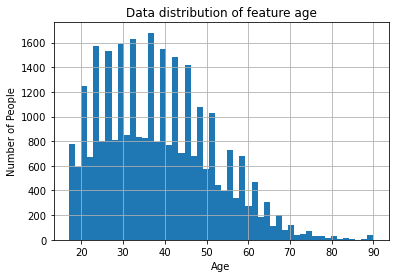

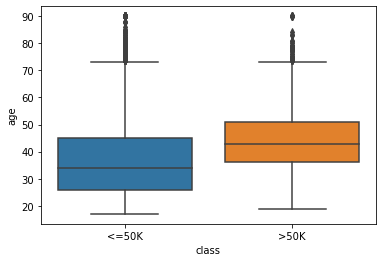

In [7]:

def continuous_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Distribution of data values of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #distribution of feature values
  print('Percentage of data distribution of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of distribution of feature values
  #print('Unique values of feature %s (sorted) (%i):\n%s\n'  % (var_name, len(df[var_name].unique()), sorted(df[var_name].unique()))) #feature's unique values
  print('Total unique values of feature %s: %i\n'  % (var_name, len(df[var_name].unique()))) #feature's unique values
  display(df[var].describe())

var='age'
continuous_feature_analysis(adult_df, var)

ax=adult_df[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age', x='class', data=adult_df)
plt.show()




most of people are aged between 20 and 50. people over 40 make > 50k 

Distribution of data values of feature fnlwgt:
203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: fnlwgt, Length: 20263, dtype: int64

Percentage of data distribution of feature fnlwgt:
203488    0.000431
123011    0.000398
113364    0.000398
164190    0.000398
121124    0.000398
            ...   
275818    0.000033
318082    0.000033
138342    0.000033
158040    0.000033
201490    0.000033
Name: fnlwgt, Length: 20263, dtype: float64

Total unique values of feature fnlwgt: 20263



count    3.016200e+04
mean     1.897938e+05
std      1.056530e+05
min      1.376900e+04
25%      1.176272e+05
50%      1.784250e+05
75%      2.376285e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

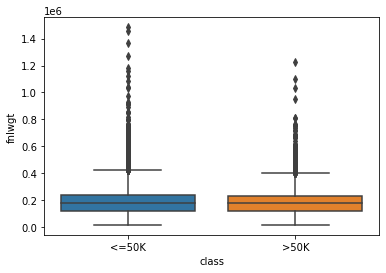

In [8]:
var='fnlwgt'
continuous_feature_analysis(adult_df, var)



sns.boxplot(y='fnlwgt', x='class', data=adult_df)
plt.show()

There's no difference between the two classes reggarding the fnlwgt variable, it indicated that this variable might not be uselful in the training 

Data values by class of feature education:
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

Percentage of data values by class of feature education:
HS-grad         0.326238
Some-college    0.221404
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
11th            0.034746
Assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
Prof-school     0.017970
9th             0.015085
12th            0.012499
Doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
Preschool       0.001492
Name: education, dtype: float64

Unique values of feature education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'As

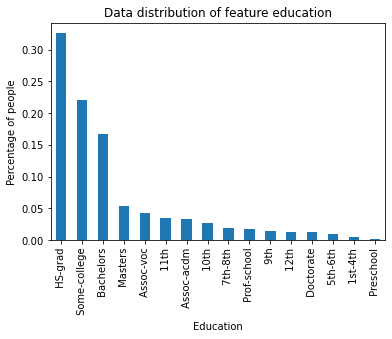

class,<=50K,>50K
education,,
10th,0.928049,0.071951
11th,0.943702,0.056298
12th,0.923077,0.076923
1st-4th,0.960265,0.039735
5th-6th,0.958333,0.041667
7th-8th,0.937163,0.062837
9th,0.945055,0.054945
Assoc-acdm,0.746032,0.253968
Assoc-voc,0.736802,0.263198


In [9]:


var='education'
categorical_feature_analysis(adult_df, var)

##plot distribution
ax=adult_df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()


display(pd.crosstab([adult_df['education']], adult_df['class'], normalize='index'))



people zith higher education make > 50

Distribution of data values of feature education-num:
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

Percentage of data distribution of feature education-num:
9     0.326238
10    0.221404
13    0.167230
14    0.053942
11    0.043333
7     0.034746
12    0.033420
6     0.027187
4     0.018467
15    0.017970
5     0.015085
8     0.012499
16    0.012433
3     0.009548
2     0.005006
1     0.001492
Name: education-num, dtype: float64

Total unique values of feature education-num: 16



count    30162.000000
mean        10.121312
std          2.549995
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64

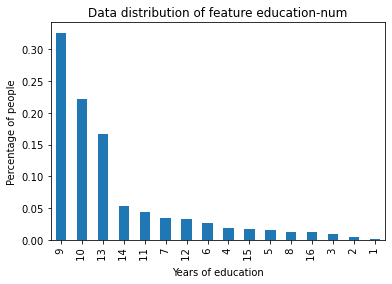

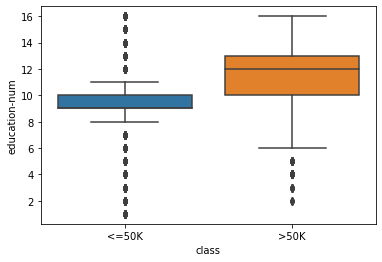

class,<=50K,>50K
education-num,,
1,1.000000,0.000000
2,0.960265,0.039735
3,0.958333,0.041667
4,0.937163,0.062837
5,0.945055,0.054945
6,0.928049,0.071951
7,0.943702,0.056298
8,0.923077,0.076923
9,0.835671,0.164329


In [10]:
var='education-num'
continuous_feature_analysis(adult_df, var)

ax=adult_df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Years of education')
ax.set_xticklabels(labels=[' 9', ' 10', ' 13', ' 14', ' 11', ' 7', ' 12', ' 6', ' 4', ' 15', ' 5', ' 8', ' 16', ' 3', ' 2', ' 1'])
plt.show()

sns.boxplot(y='education-num', x='class', data=adult_df)
plt.show()

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([adult_df['education-num']], adult_df['class'], normalize='index'))



Data values by class of feature workclass:
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

Percentage of data values by class of feature workclass:
Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: workclass, dtype: float64

Unique values of feature workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']



ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

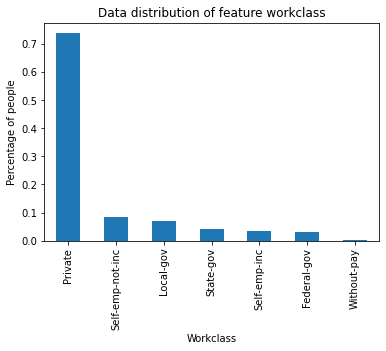

In [11]:
var='workclass'
categorical_feature_analysis(adult_df, var)

##plot distribution
ax=adult_df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Workclass')
ax.set_xticklabels(labels=[' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'])
plt.show()


display(pd.crosstab([adult_df['workclass']], adult_df['class'], normalize='index'))

pd.crosstab([adult_df['workclass']], adult_df['class'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Data values by class of feature occupation:
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

Percentage of data values by class of feature occupation:
Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-support         0.030237
Protective-serv      0.021351
Priv-house-serv      0.004741
Armed-Forces         0.000298
Name: occupation, dtype: float64

Unique values of feature occupation:
['Adm-cleri

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (15).

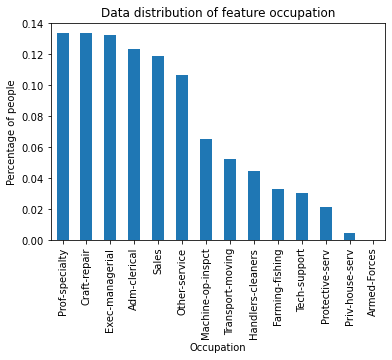

In [ ]:
var='occupation'
categorical_feature_analysis(adult_df, var)

##plot distribution
ax=adult_df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Occupation')
ax.set_xticklabels(labels=[' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service', ' Machine-op-inspct', ' ?', ' Transport-moving', ' Handlers-cleaners', 
                           ' Farming-fishing', ' Tech-support', ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'])
plt.show()

display(pd.crosstab([adult_df['occupation']], adult_df['class'], normalize='index'))

pd.crosstab([adult_df['occupation']], adult_df['class'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

## FEATURE ENGINEERING

In [22]:

##categorical features
adult_df=pd.get_dummies(adult_df, columns=['class', 'sex'], drop_first=True) #binary transformation
adult_df_test=pd.get_dummies(adult_df_test, columns=['class', 'sex'], drop_first=True) #binary transformation


def group_workclass(val):
  #combination of similar classes with few data
  if val==' Without-pay' or val==' Never-worked':            
    return ' WO_pay'
  else:
    return val

def group_occupation(val):
  #combination of similar classes and with few data
  if val==' Armed-Forces' or val==' ?' or val==' Other-service':       
    return ' Other-service'
  else:
    return val

def group_marital_status(val):
  #combination of similar classes
  if val==' Married-civ-spouse' or val==' Married-AF-spouse':       
    return ' Married'
  elif val==' Never-married':
    return val
  else:
    return ' No-spouse'

def group_relationship(val):
  #combination of similar classes
  if val==' Husband' or val==' Wife':       
    return ' Spouse'
  else:
    return val

def group_race(val):
  #combination of classes with few data
  if val==' White':       
    return val
  else:
    return ' Other'

def group_native_country(val):
  #abstraction of classes
  if val==' United-States':       
    return val
  elif val in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' Columbia', ' Ecuador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Haiti', 
               ' Dominican-Republic', ' El-Salvador', ' Trinadad&Tobago', ' South']:
    return ' America'
  elif val in [' England', ' Canada', ' Germany', ' Italy', ' Poland',  ' Portugal', ' France', ' Greece',  ' Ireland', ' Hungary', ' Yugoslavia', ' Holand-Netherlands', 
               ' Scotland']:
    return ' Europe'
  elif val in [' India', ' Philippines', ' Iran', ' Cambodia', ' Thailand', ' Laos', ' Taiwan', ' China', ' Japan', ' Vietnam', ' Hong']:
    return ' Asia'
  else:
    return ' ?'

##creation of new features from the combination and abstraction of existing classes
adult_df['workclass_simple']=adult_df['workclass'].map(group_workclass)
adult_df['occupation_simple']=adult_df['occupation'].map(group_occupation)
adult_df['marital-status_simple']=adult_df['marital-status'].map(group_marital_status)
adult_df['relationship_simple']=adult_df['relationship'].map(group_relationship)
adult_df['race_simple']=adult_df['race'].map(group_race)
adult_df['native-country_simple']=adult_df['native-country'].map(group_native_country)
adult_df=pd.get_dummies(adult_df, columns=['workclass_simple', 'occupation_simple', 'marital-status_simple', 'relationship_simple', 'race_simple', 'native-country_simple'], drop_first=True)

##test dataset
adult_df_test['workclass_simple']=adult_df_test['workclass'].map(group_workclass)
adult_df_test['occupation_simple']=adult_df_test['occupation'].map(group_occupation)
adult_df_test['marital-status_simple']=adult_df_test['marital-status'].map(group_marital_status)
adult_df_test['relationship_simple']=adult_df_test['relationship'].map(group_relationship)
adult_df_test['race_simple']=adult_df_test['race'].map(group_race)
adult_df_test['native-country_simple']=adult_df_test['native-country'].map(group_native_country)

adult_df_test=pd.get_dummies(adult_df_test, columns=['workclass_simple', 'occupation_simple', 'marital-status_simple', 'relationship_simple', 'race_simple', 'native-country_simple'], drop_first=True)
adult_df.head(4)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,...,occupation_simple_Prof-specialty,occupation_simple_Protective-serv,occupation_simple_Sales,occupation_simple_Tech-support,occupation_simple_Transport-moving,relationship_simple_Not-in-family,relationship_simple_Other-relative,relationship_simple_Own-child,relationship_simple_Unmarried,relationship_simple_Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,...,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
##binary feature for assets
adult_df['has_asset']=(adult_df['capital-gain'] > 0) | (adult_df['capital-loss'] > 0)
adult_df['has_asset']=adult_df['has_asset'].astype(int)
#display(train_data['has_asset'])

adult_df_test['has_asset']=(adult_df_test['capital-gain'] > 0) | (adult_df_test['capital-loss'] > 0)
adult_df_test['has_asset']=adult_df_test['has_asset'].astype(int)

adult_df.head(4)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,...,occupation_simple_Protective-serv,occupation_simple_Sales,occupation_simple_Tech-support,occupation_simple_Transport-moving,relationship_simple_Not-in-family,relationship_simple_Other-relative,relationship_simple_Own-child,relationship_simple_Unmarried,relationship_simple_Wife,has_asset
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,...,0,0,0,0,1,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0,0,0,0,1,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
#merged_df = pd.concat([adult_df, adult_df_test], ignore_index=True)

#merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   age                                  45222 non-null  int64 
 1   workclass                            45222 non-null  object
 2   fnlwgt                               45222 non-null  int64 
 3   education                            45222 non-null  object
 4   education-num                        45222 non-null  int64 
 5   marital-status                       45222 non-null  object
 6   occupation                           45222 non-null  object
 7   relationship                         45222 non-null  object
 8   race                                 45222 non-null  object
 9   sex                                  45222 non-null  object
 10  capital-gain                         45222 non-null  int64 
 11  capital-loss                         4522

In [160]:
#merged_df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,occupation_simple_Prof-specialty,occupation_simple_Protective-serv,occupation_simple_Sales,occupation_simple_Tech-support,occupation_simple_Transport-moving,relationship_simple_Not-in-family,relationship_simple_Other-relative,relationship_simple_Own-child,relationship_simple_Unmarried,relationship_simple_Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

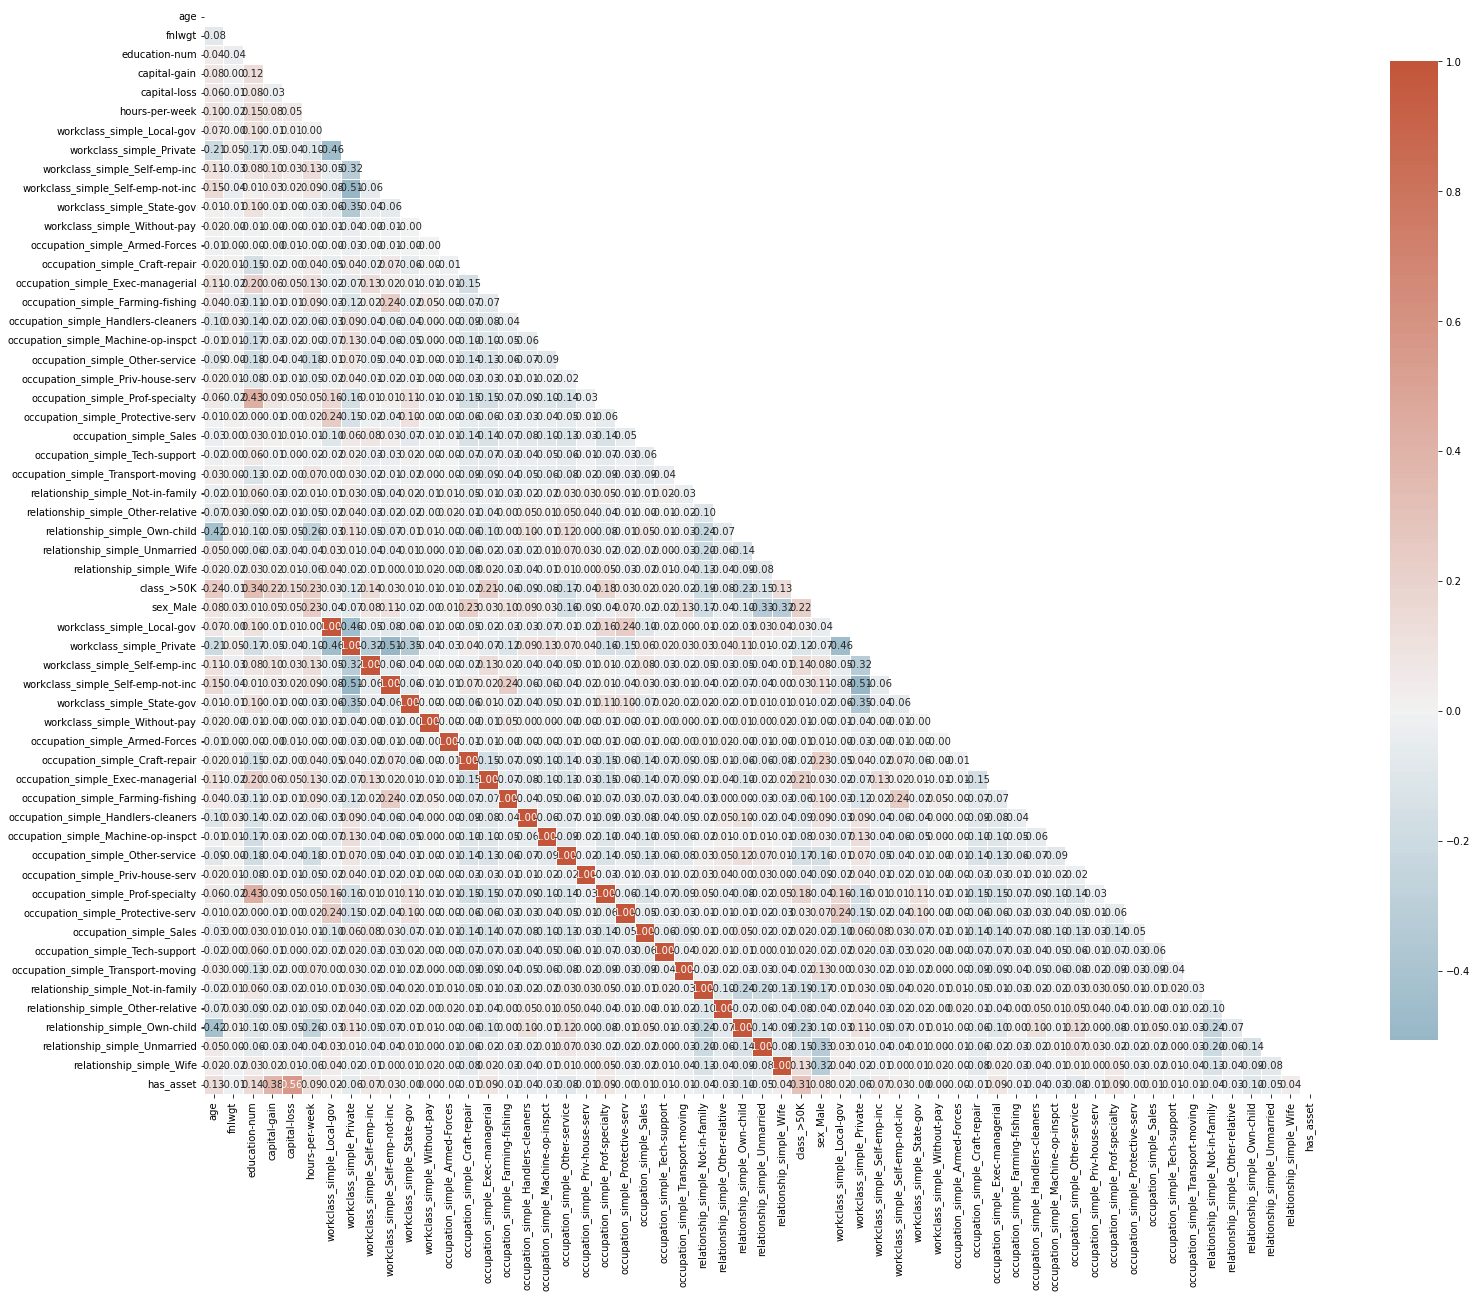

In [24]:

corr=adult_df.iloc[:, :].corr()
#display(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, fmt='.2f')

In [106]:
# Check missing value code and convert to NaNs
object_col = merged_df.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(merged_df[col].value_counts(dropna=False)/merged_df.shape[0],'\n')

Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: workclass, dtype: float64 

HS-grad         0.326898
Some-college    0.218898
Bachelors       0.167396
Masters         0.055592
Assoc-voc       0.043320
11th            0.035801
Assoc-acdm      0.033324
10th            0.027044
7th-8th         0.018199
Prof-school     0.017359
9th             0.014948
12th            0.012759
Doctorate       0.012030
5th-6th         0.009929
1st-4th         0.004909
Preschool       0.001592
Name: education, dtype: float64 

Married-civ-spouse       0.465592
Never-married            0.322807
Divorced                 0.139246
Separated                0.031202
Widowed                  0.028238
Married-spouse-absent    0.012206
Married-AF-spouse        0.000708
Name: marital-status, dtype: float64 

Craft-repair         0.133121
Prof-specialty       0

In [107]:
# Check the skewness of numerical variables in data set
num_col = merged_df.dtypes[adult_df.dtypes != 'object'].index
# Calculate skew and sort
skew_feats = merged_df[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
occupation_simple_Armed-Forces,56.809834
workclass_simple_Without-pay,46.374257
occupation_simple_Priv-house-serv,13.854252
capital-gain,11.789002
occupation_simple_Protective-serv,6.584751
relationship_simple_Other-relative,5.527692
occupation_simple_Tech-support,5.374087
occupation_simple_Farming-fishing,5.252720
workclass_simple_Self-emp-inc,4.951088
capital-loss,4.516304


<bound method NDFrame.describe of        workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                        0.0                  0.0                0.0   
1                        0.0                  0.0                0.0   
2                        0.0                  0.0                1.0   
3                        0.0                  0.0                1.0   
4                        0.0                  0.0                1.0   
...                      ...                  ...                ...   
45217                    0.0                  0.0                1.0   
45218                    0.0                  0.0                1.0   
45219                    0.0                  0.0                1.0   
45220                    0.0                  0.0                1.0   
45221                    0.0                  0.0                0.0   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                         0.0           

(68028, 134)

In [74]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.25, stratify=y_train_oversampled, random_state=376) #test_size=0.2, 0.3
print(X_train1.head())
print(y_train1.head())
print('x_train shape: ', X_train1.shape)
print(X_train1.shape[0], 'training samples')
print(X_train1.shape[1], 'features')

print('y_train shape: ', y_train1.shape)




            age    fnlwgt  education-num  capital-gain  capital-loss  \
1757   0.287671  0.117512       0.400000           0.0           0.0   
29575  0.589041  0.113024       0.400000           0.0           0.0   
10125  0.191781  0.071717       0.800000           0.0           0.0   
33902  0.410959  0.071255       0.533333           0.0           0.0   
15068  0.328767  0.129772       0.666667           0.0           0.0   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
1757         0.448980                    0.0                  0.0   
29575        0.397959                    0.0                  0.0   
10125        0.602041                    0.0                  0.0   
33902        0.397959                    0.0                  0.0   
15068        0.397959                    0.0                  0.0   

       workclass_Private  workclass_Self-emp-inc  ...  \
1757                 1.0                     0.0  ...   
29575                1.0              

In [15]:

#df_train = pd.concat([X_train, y_train], axis=1)

#df_majority = df_train[df_train['class']==0]
#df_minority = df_train[df_train['class']==1]

#df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

#df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# separate the features and the target variable
#X_train_oversampled = df_oversampled.drop('class', axis=1)
#y_train_oversampled = df_oversampled['class']
#y_train_oversampled.shape


In [75]:
# Set input & output dimensions
inputs = X_train_oversampled.shape[0]
outputs = X_train_oversampled.shape[1]
inputs

68028

In [17]:
#y_train_oversampled = np_utils.to_categorical(y_train_oversampled, num_classes=2)
#print('New y_train shape: ', y_train_oversampled.shape)
#print('New y_train shape: ', y_train_oversampled.shape[0])
#print('New y_train shape: ', y_train_oversampled.shape[1])




In [76]:
import tensorflow as tf
import keras

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train1.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train1, y_train1, epochs=10, validation_data=(X_test1, y_test1), batch_size=32,callbacks=callbacks_list)

test_loss, test_acc = model.evaluate(X_train1, y_train1)




Epoch 1/10
1595/1595 [==============================] - 8s 4ms/step - loss: 0.4299 - accuracy: 0.7971 - val_loss: 0.3942 - val_accuracy: 0.8168
Epoch 2/10
1595/1595 [==============================] - 6s 4ms/step - loss: 0.4016 - accuracy: 0.8125 - val_loss: 0.3883 - val_accuracy: 0.8175
Epoch 3/10
1595/1595 [==============================] - 7s 4ms/step - loss: 0.3937 - accuracy: 0.8177 - val_loss: 0.3812 - val_accuracy: 0.8238
Epoch 4/10
1595/1595 [==============================] - 6s 4ms/step - loss: 0.3883 - accuracy: 0.8205 - val_loss: 0.3778 - val_accuracy: 0.8259
Epoch 5/10
1595/1595 [==============================] - 18s 11ms/step - loss: 0.3827 - accuracy: 0.8238 - val_loss: 0.3734 - val_accuracy: 0.8268
Epoch 6/10
1595/1595 [==============================] - 16s 10ms/step - loss: 0.3783 - accuracy: 0.8264 - val_loss: 0.3720 - val_accuracy: 0.8265
Epoch 7/10
1595/1595 [==============================] - 18s 11ms/step - loss: 0.3749 - accuracy: 0.8271 - val_loss: 0.3709 - val_acc

In [77]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test1)

threshold = 0.5
y_pred = (predictions > threshold).astype(int)

print(classification_report(y_test1, y_pred))


532/532 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      8504
           1       0.81      0.87      0.84      8503

    accuracy                           0.83     17007
   macro avg       0.83      0.83      0.83     17007
weighted avg       0.83      0.83      0.83     17007



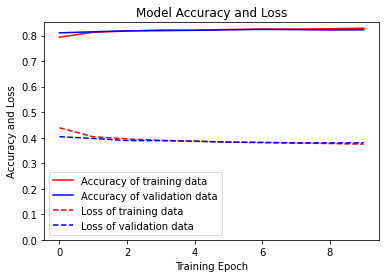

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


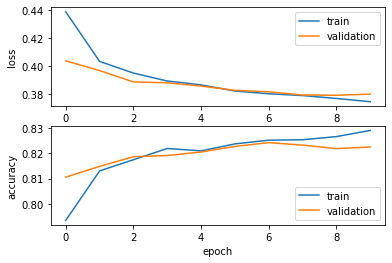

In [34]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;
plot_history(history)